# MILESTONE 1

### Full Time Data Science
---

- Dashboard:
https://public.tableau.com/views/milestone1_jovanca_stevani/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Introduction


Name : Jovanca Stevani Tanjung

Batch 002 HCK

## Problem Statement
### Analyzing crime rate occured in Chicago city in year 2022.


## Problem Description

1. What are 5 crimes that occurred the most in Chicago city in the year 2022?
2. What are 3 districts that occurred crimes the most in Chicago in the year 2022?
3. How many theft cases occurred in the 3 districts with the most theft crimes in 2022.
4. What type of theft has happened the most in district 1?
5. What is the mean, median and mode of theft cases from overall and from 3 districts with the most theft crimes.
6. The influence of district on the arrest status in district 1.


## Data Loading

import libraries which gonna be used in this analysis

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [311]:
df = pd.read_csv('chicago_crime.csv')
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,26735,JF225985,2022-04-30 11:19:00 UTC,005XX E 106TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,9.0,49,01A,1181917.0,1834793.0,2022,2022-09-18 04:45:51 UTC,41.701895,-87.609487,"(41.701895341, -87.60948662)"
1,26716,JD241157,2022-01-04 09:26:00 UTC,000XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,34.0,49,01A,1177877.0,1835347.0,2022,2022-09-18 04:45:51 UTC,41.703508,-87.624263,"(41.703507823, -87.624263094)"
2,12853594,JF427771,2022-10-08 11:30:00 UTC,003XX W 105TH PL,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,34.0,49,02,NaN,NaN,2022,2022-10-24 04:47:03 UTC,NaN,NaN,NaN
3,12774587,JF333702,2022-07-27 02:55:00 UTC,104XX S STATE ST,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,34.0,49,03,NaN,NaN,2022,2022-10-24 04:47:03 UTC,NaN,NaN,NaN
4,12838326,JF409392,2022-09-24 12:00:00 UTC,003XX W 104TH ST,031A,ROBBERY,ARMED - HANDGUN,ALLEY,False,False,...,34.0,49,03,NaN,NaN,2022,2022-10-24 04:47:03 UTC,NaN,NaN,NaN


In [312]:
df.tail()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
184032,12853438,JF427588,2022-10-09 05:43:00 UTC,021XX S MARSHALL BLVD,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,12.0,30,15,NaN,NaN,2022,2022-10-24 04:47:03 UTC,NaN,NaN,NaN
184033,12713784,JF260269,2022-05-29 05:18:00 UTC,019XX S FAIRFIELD AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,12.0,30,15,NaN,NaN,2022,2022-10-24 04:47:03 UTC,NaN,NaN,NaN
184034,12772235,JF330987,2022-01-13 07:00:00 UTC,028XX W CULLERTON ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,12.0,30,26,NaN,NaN,2022,2022-10-24 04:47:03 UTC,NaN,NaN,NaN
184035,12598345,JF120017,2022-01-20 02:37:00 UTC,025XX W CERMAK RD,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,SMALL RETAIL STORE,False,True,...,28.0,31,26,1159883.0,1889319.0,2022,2022-10-11 04:45:59 UTC,41.852002,-87.688672,"(41.852002281, -87.688672081)"
184036,12806659,JF371680,2022-08-26 05:34:00 UTC,015XX S FAIRFIELD AVE,5111,OTHER OFFENSE,GUN OFFENDER - ANNUAL REGISTRATION,HOSPITAL BUILDING / GROUNDS,True,False,...,28.0,29,26,NaN,NaN,2022,2022-10-24 04:47:03 UTC,NaN,NaN,NaN


After we load the data, then we choose which columns we're going to use for our analysis.

In [313]:
df_chicago = df.loc[:,['date', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'district']]
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184037 entries, 0 to 184036
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   date                  184037 non-null  object
 1   primary_type          184037 non-null  object
 2   description           184037 non-null  object
 3   location_description  183529 non-null  object
 4   arrest                184037 non-null  bool  
 5   domestic              184037 non-null  bool  
 6   district              184037 non-null  int64 
dtypes: bool(2), int64(1), object(4)
memory usage: 7.4+ MB


After checking the data type from each columns, we can see that the data type of 'date' column is object. so we are going to convert it to datetime. then create a column called 'month' that has a month value from the date column.

In [403]:
df_chicago['date'] = pd.to_datetime(df_chicago['date'])
df_chicago['month'] = df_chicago['date'].dt.month
df_chicago['arrest'].value_counts()

False    162379
True      21150
Name: arrest, dtype: int64

Based on the data, as we can see the total number of False value from arrest column which means that the perpretor is not getting arrested is quite high compared to True value which means the perperator got arrested.

## Data Cleaning

In [317]:
missing_value = ["NaN", "N/A", "null"]
df_chicago.isnull().sum().sum()
df_chicago.dropna(inplace = True)
df_chicago.reset_index(drop=True, inplace=True)
df_chicago

,date,primary_type,description,location_description,arrest,domestic,district,month
0,2022-04-30 11:19:00+00:00,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,5,4
1,2022-01-04 09:26:00+00:00,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,5,1
2,2022-10-08 11:30:00+00:00,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,5,10
3,2022-07-27 02:55:00+00:00,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,5,7
4,2022-09-24 12:00:00+00:00,ROBBERY,ARMED - HANDGUN,ALLEY,False,False,5,9
...,...,...,...,...,...,...,...,...
183524,2022-10-09 05:43:00+00:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,10,10
183525,2022-05-29 05:18:00+00:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,10,5
183526,2022-01-13 07:00:00+00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,10,1
183527,2022-01-20 02:37:00+00:00,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,SMALL RETAIL STORE,False,True,10,1


After doing data cleaning, we have 183529 rows left, from 184037 rows. Means there are 508 rows that has missing values.

----

## Data Exploration

### 1. What are 5 crimes that occurred the most in Chicago city in the year 2022?

In [318]:
most_crime = df_chicago['primary_type'].value_counts().head().to_frame()
most_crime.columns=["jumlah"]
most_crime.reset_index(inplace=True)
most_crime

,index,jumlah
0,THEFT,42779
1,BATTERY,33004
2,CRIMINAL DAMAGE,21123
3,ASSAULT,16630
4,MOTOR VEHICLE THEFT,14188


the data above shows the first 5 crimes that has highest accumulation value which means the crime happened the most. and I convert the data to dataframe so I can do further analysis.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'THEFT'),
  Text(1, 0, 'BATTERY'),
  Text(2, 0, 'CRIMINAL DAMAGE'),
  Text(3, 0, 'ASSAULT'),
  Text(4, 0, 'MOTOR VEHICLE THEFT')])

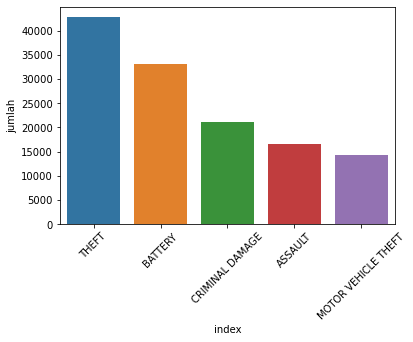

In [320]:
sns.barplot(data=most_crime, x="index", y="jumlah")
plt.xticks(rotation=45)

The chart above is showing the visualization of the data we just got, which is 5 crimes that happened the most in Chicago city in the year 2022. As we can see, THEFT has the highest total value, it means that THEFT is the most occured crime in Chicago city. and there's BATTERY as the second highest, followed by CRIMINAL DAMAGE, ASSAULT and MOTOR VEHICLE THEFT.

In [321]:
most_crime.to_csv('df1.csv', index=False)

----

### 2. What are 3 districts that occurred crimes the most in Chicago in the year 2022?

In [409]:
district = df_chicago['district'].value_counts().head(3).to_frame()
district.columns=["jumlah"]
district.reset_index(inplace=True)

district

,index,jumlah
0,6,11342
1,8,11240
2,4,10748


From the result we got above, we can see that district 6, 8 and 4 are the 3 districts that have crime occurred the most. 

(array([0, 1, 2]), [Text(0, 0, '4'), Text(1, 0, '6'), Text(2, 0, '8')])

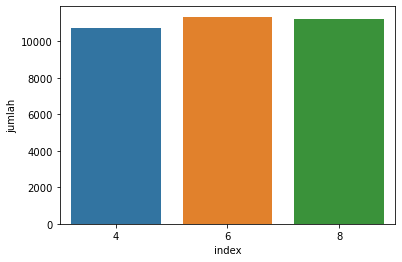

In [410]:
sns.barplot(data=district, x="index", y="jumlah")
plt.xticks(rotation=0)

The bar plot above shows us the graph of 3 district that have crime occured the most. We also can tell that the difference is not significant.
- District 6 = 11342 cases
- District 8 = 11240 cases
- District 4 = 10748 cases

In [325]:
district.to_csv("df2.csv", index=False)

---

### 3. How many theft cases occurred in the 3 districts with the most theft crimes in 2022?

In [326]:
theft_crime = df_chicago[df_chicago["primary_type"] == "THEFT"]
theft_crime["district"].value_counts().head(3)
theft_crime

,date,primary_type,description,location_description,arrest,domestic,district,month
38,2022-01-03 12:00:00+00:00,THEFT,OVER $500,STREET,False,False,5,1
39,2022-06-30 04:15:00+00:00,THEFT,OVER $500,STREET,False,False,5,6
40,2022-09-11 12:00:00+00:00,THEFT,OVER $500,RESIDENCE,False,True,5,9
41,2022-05-18 11:52:00+00:00,THEFT,OVER $500,STREET,True,False,5,5
42,2022-08-05 02:30:00+00:00,THEFT,$500 AND UNDER,RESIDENCE,False,False,5,8
...,...,...,...,...,...,...,...,...
183507,2022-06-19 12:00:00+00:00,THEFT,$500 AND UNDER,STREET,False,False,10,6
183508,2022-08-22 12:00:00+00:00,THEFT,$500 AND UNDER,SMALL RETAIL STORE,False,False,10,8
183509,2022-03-03 11:30:00+00:00,THEFT,FROM BUILDING,OTHER (SPECIFY),False,False,10,3
183510,2022-03-04 08:00:00+00:00,THEFT,FROM BUILDING,APARTMENT,False,False,10,3


In [327]:
theft_crime["district"].value_counts().head(3)

1     3964
18    3924
19    3698
Name: district, dtype: int64

To find 3 district with the most theft crime cases occurred, I specify the "primary_type" only for THEFT type. Then use value_counts with head(3) to show which districts have the highest value of total theft happening. From the data above, those districts are:
- District 1 = 3964 cases
- District 18 = 3924 cases
- District 19 = 3698 cases

District 1 has the highest total number of theft crime cases. 

In [328]:
most_district = theft_crime[(theft_crime['district'] == 1) | (theft_crime['district'] == 18) | (theft_crime["district"] == 19)]
dist = most_district.groupby(by=["month", "primary_type", "district"])[["date"]].count()
dist.reset_index(inplace=True)
dist.rename(columns={"date": "value"}, inplace=True)

<AxesSubplot:xlabel='month', ylabel='value'>

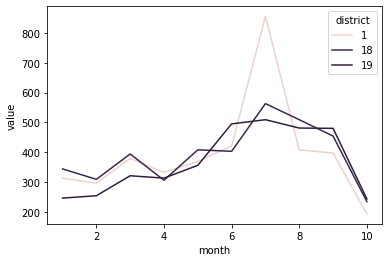

In [329]:
sns.lineplot(data=dist, x="month", y="value", hue="district")

To show the visualization, first thing I did is filter the specific value of district that I want to use which is 1, 18 and 19.
From the chart above, we can see that the difference of district 18 and 19 is not significant. But if we look at district 1 line, there's an extreme increase on month 7. then it decreased extremely onwards.

In [330]:
dist.to_csv("df3.csv", index=False)

---

### 4. What type of theft has happened the most in district 1?

In [331]:
dist_1 = theft_crime[theft_crime["district"] == 1]
district1 = dist_1.groupby(by=["district"])[["description"]].value_counts().to_frame()
district1.reset_index(inplace=True)
district1.columns=["district", "description", "value"]
district1

,district,description,value
0,1,RETAIL THEFT,1099
1,1,OVER $500,1074
2,1,$500 AND UNDER,858
3,1,POCKET-PICKING,536
4,1,FROM BUILDING,345
5,1,PURSE-SNATCHING,29
6,1,ATTEMPT THEFT,21
7,1,DELIVERY CONTAINER THEFT,2


<AxesSubplot:xlabel='value', ylabel='description'>

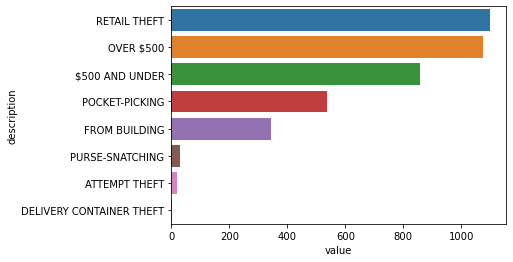

In [332]:
sns.barplot(data=district1, x="value", y="description")

To get the data above, the first thing I do is specify the district value to district 1. After we do more analysis and got the new table with description and its value, we can show the chart. 
Based on the bar chat we just got, we can see that RETAIL THEFT is the theft crime type that occurred the most on district 1, which 1099 cases, followed by OVER $500 for 1074 cases.

In [333]:
district1.to_csv("df4.csv", index=False)

---

### 5. What is the mean, median and mode of theft cases from overall and from 3 districts with the most theft crimes?

Central Tendency

- Analyze the central tendency from theft crime cases from overall data
- Analyze the central tendency from 3 districts that have the most theft crime cases


### a. Central Tendency From Theft Crime Cases from Overall Data

In [334]:
total = theft_crime.groupby(by=["month", "primary_type", "district"])[["date"]].count()
total.reset_index(inplace=True)
total.rename(columns={"date": "value"}, inplace=True)

In [335]:
#Mean
a = total["value"].mean()

print(f"The average value of theft crimes from all district is: ", a)

The average value of theft crimes from all district is:  194.45


In [336]:
#Median
b = total["value"].median()

print(f"The median value of theft crimes from all district is: ", b)

The median value of theft crimes from all district is:  161.5


In [337]:
#Mode
c = theft_crime['district'].mode()

print(f"The mode of district from theft crimes : ", c)

The mode of district from theft crimes :  0    1
Name: district, dtype: int64


From the data we just analyze, the central tendency of theft crime cases from overall data are:
- Mean = 194.45
- Median = 161.5
- Mode = District 1

### b. Central Tendency from 3 Districts Which Have the Most Theft Crime Cases

In [338]:
#Mean
d = dist["value"].mean()

print(f"The average value of theft crimes from 3 districts with the most crimes cases is : ", d)

The average value of theft crimes from 3 districts with the most crimes cases is :  386.2


In [339]:
#Median
e = dist["value"].median()

print(f"The median value of theft crimes from 3 districts with the most crimes cases is : ", e)

The median value of theft crimes from 3 districts with the most crimes cases is :  374.0


In [340]:
f = dist["value"].mode()

print(f"The mode value of 3 districts with the most crimes cases is : ", f)

The mode value of 3 districts with the most crimes cases is :  0    313
1    408
2    509
Name: value, dtype: int64


From the data we just analyze, the central tendency of 3 districts which have the most theft crime cases are:
- Mean = 386.2
- Median = 374.0
- Mode = 313

---

## 6. The influence of district on the arrest status in district 1 (ANOVA TESTING)

In [411]:
a1 = theft_crime[(theft_crime['district'] == 1) | (theft_crime['district'] == 18) | (theft_crime["district"] == 19)]

In [412]:
a2 = a1.groupby(by=["arrest", "district"])[["date"]].count()
a2.reset_index(inplace=True)
a2.rename(columns={"date": "value"}, inplace=True)
a2

,arrest,district,value
0,False,1,3690
1,False,18,3690
2,False,19,3586
3,True,1,274
4,True,18,234
5,True,19,112


Before I analyze any further, I specify the district value that I need, which is district 1, 18 and 19.Then after some analysis, I got the total value based on the arrest status on each district. 
- District 1 =
    - False = 3690
    - True = 274
- District 18 =
    - False = 3690
    - True = 234
- District 19 =
    - False = 3586
    - True = 112

In [352]:
contingency = pd.crosstab(a1["arrest"], a1["district"])
contingency

district,1,18,19
arrest,,,
False,3690,3690,3586
True,274,234,112


<AxesSubplot:xlabel='district', ylabel='value'>

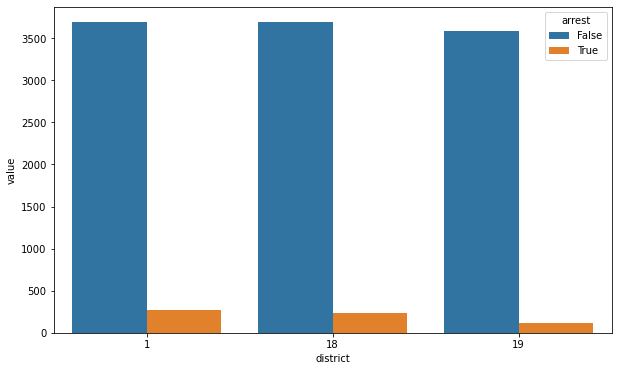

In [421]:
plt.figure(figsize=(10,6))
sns.barplot(x='district',y='value', hue='arrest', data=a2)
#plt.xticks(rotation=90)

In [422]:
a2.to_csv("df5.csv", index=False)

Based on the visualization above, it shows that district 1, 18 and 19 have a difference which is not significant with one another. I tried to find whether the district columns and arrest columns are related or not using chi-square methode.

In [415]:
a1['arrest'] = a1['arrest'].replace({True:1,False:0})
a1['date'] = a1['date'].dt.date

C:\Users\jovan\AppData\Local\Temp\ipykernel_22980\1165523854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['arrest'] = a1['arrest'].replace({True:1,False:0})
C:\Users\jovan\AppData\Local\Temp\ipykernel_22980\1165523854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['date'] = a1['date'].dt.date


In [417]:
data1 = a1[a1.district == 1].groupby('date')['arrest'].sum()
data2 = a1[a1.district == 18].groupby('date')['arrest'].sum()
data3 = a1[a1.district == 19].groupby('date')['arrest'].sum()

print(data1.mean())
print(data2.mean())
print(data3.mean())

0.9448275862068966
0.8068965517241379
0.38620689655172413


### H0 : data1 = data2 = data3

### H1 : data1 != data2 != data3

In [388]:
f_stat,p_value = stats.f_oneway(data1, data2, data3)
print('P-value:',p_value)

P-value: 1.850782353002006e-14


In [418]:
stat, p, dof, expected = stats.chi2_contingency(contingency)
print('p=%.3f' %(p))
if p <= 0.05:
    print("Berpengaruh")
else:
    print("Tidak berpengaruh")

p=0.000
Berpengaruh


Based on the data visualization we got before, the difference between district 1, 18 and 19 is not significant. But after we do the analysis using ANOVA testing, the analysis result showing that the difference between those 3 districts are significant. It showed from the mean value from each district data we just got.

---

## ANALYSIS AND CONCLUSION

From overall data, "THEFT" is the most occurred crime in Chicago in the year 2022 with total 42779 cases. Meanwhile, district 6 is district that has the most crime occurreed in Chicago in year 2022 with total 11342 cases reported.

But after we analyze further, district 1 is district that has the most theft crime cases occurred with 3964 cases in the year 2022. Then we also got another result by finding out about which theft crime type occurred the most in district 1 with 1099 cases of RETAIL THEFT.

Last but not least, I analyzed the influence of district based on the arrest status in district 1 using ANOVA testing, at first I do data visualization and find out that the difference of each district is not significant. But after doing ANOVA testing, turned out the difference of each districts are significant.

From the analysis we just done, we can conclude that district 19 is the most safest district if we see it based on the theft crime cases value, compared to the other 2 district (1 and 18).

The amount of crime cases that happened in Chicago city can be evaluations for the government and the citizen to increase the safety and look out for each other to lower the number of crime that's happening.
